In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime

In [2]:
path = 'cleaned_data.csv'

satinfo_df = pd.read_csv(path)

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

satinfo_df.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
0,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,...,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...,JMSatcat/3_20,2019
1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,0.0,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated,2018
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Unknown,LEO,Unknown,0.0,...,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17,2017
3,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,0.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50,2016
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Unknown,75.0,...,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA,2014


In [3]:
#At what altitude do most satellites orbit?
orbit_info = satinfo_df[['Class of Orbit','Country of Operator/Owner',]]

grouped_sat = satinfo_df.groupby('Class of Orbit').nunique()[['Country of Operator/Owner',]]

grouped_sat

,Country of Operator/Owner
Class of Orbit,
Elliptical,8
GEO,50
LEO,88
MEO,5


In [4]:
new_index = grouped_sat.reset_index()

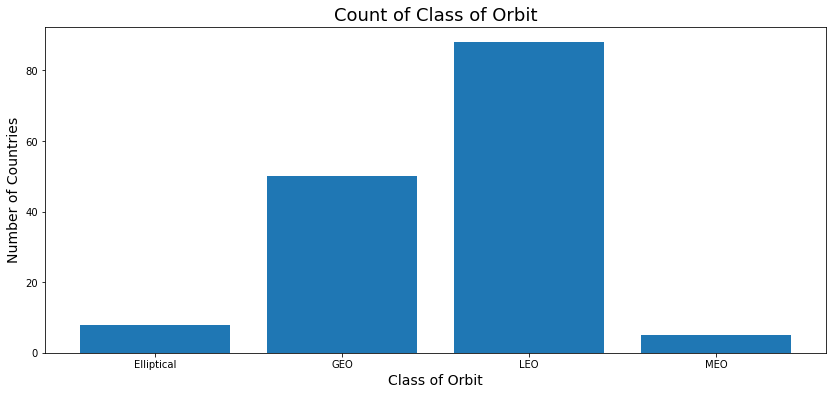

In [16]:
x_value = new_index['Class of Orbit']
y_value = new_index['Country of Operator/Owner']

fig, ax = plt.subplots(figsize=(14,6))
plt.bar(x_value, y_value)
plt.title('Count of Class of Orbit',fontsize = 18)
plt.xlabel('Class of Orbit', fontsize = 14)
plt.ylabel('Number of Countries', fontsize = 14)
plt.savefig("ClassofOrbit.png")

plt.show()

In [14]:
#When was the oldest working satellite launched?
oldest_sat = satinfo_df.sort_values('Launch Year')
oldest_sat

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year
79,Amsat-Oscar 7,USA,USA,AMSAT-NA,Civil,Communications,Unknown,LEO,Polar,0.00,...,0.0,Amsat-NA,USA,Vandenberg AFB,Delta 2310,1974-089B,7530,American amateur radio satellite.,www.satellitedebris.net 12/12,1974
2503,TDRS-3,USA,USA,National Aeronautics and Space Administration ...,Government,Communications,Optical Imaging,GEO,Unknown,84.41,...,10.0,TRW Defense and Space Systems Group,USA,Cape Canaveral,Space Shuttle (STS 26),1988-091B,19548,Backup; still partially operational.,JM/12_08,1988
662,USA 46,USA,USA,US Navy,Military,Communications,Unknown,GEO,Unknown,-14.74,...,5.0,"TRW, Defense and Space Systems Group",USA,Cape Canaveral,Atlas Centaur,1989-077A,20253,Old system replaced by UFO satellites; this sa...,JM/2_09,1989
1849,Skynet 4C,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Military,Communications,Unknown,GEO,Unknown,-1.30,...,7.0,Astrium,France/UK/Germany,Guiana Space Center,Ariane 44LP,1990-079A,20776,Spare. In March 2010 it was announced that the...,JM/12_08,1990
897,Hubble Space Telescope,USA,ESA/USA,European Space Agency (ESA)/NASA,Government,Space Science,Unknown,LEO,Non-Polar Inclined,0.00,...,10.0,European Space Agency/NASA,International,Cape Canaveral,Space Shuttle (STS 31),1990-037B,20580,Exploration of space.,www.satellitedebris.net 12/12,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Starlink-1350,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,0.0,SpaceX,USA,Cape Canaveral,Falcon 9,2020-025E,45535,Unknown,NaN,2020
2260,Starlink-1351,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,0.0,SpaceX,USA,Cape Canaveral,Falcon 9,2020-035AS,45697,Unknown,ZARYA,2020
2261,Starlink-1352,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,0.0,SpaceX,USA,Cape Canaveral,Falcon 9,2020-025F,45536,Unknown,NaN,2020
2263,Starlink-1354,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,0.0,SpaceX,USA,Cape Canaveral,Falcon 9,2020-025AH,45562,Unknown,NaN,2020


In [18]:
bins = [1970,1979,1989,1999,2009,2020]

labels= ['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020']

oldest_sat['bins'] = pd.cut(oldest_sat['Launch Year'], bins, labels=labels, include_lowest = False, right = True)

oldest_sat

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Launch Year,bins
79,Amsat-Oscar 7,USA,USA,AMSAT-NA,Civil,Communications,Unknown,LEO,Polar,0.00,...,Amsat-NA,USA,Vandenberg AFB,Delta 2310,1974-089B,7530,American amateur radio satellite.,www.satellitedebris.net 12/12,1974,1970-1980
2503,TDRS-3,USA,USA,National Aeronautics and Space Administration ...,Government,Communications,Optical Imaging,GEO,Unknown,84.41,...,TRW Defense and Space Systems Group,USA,Cape Canaveral,Space Shuttle (STS 26),1988-091B,19548,Backup; still partially operational.,JM/12_08,1988,1980-1990
662,USA 46,USA,USA,US Navy,Military,Communications,Unknown,GEO,Unknown,-14.74,...,"TRW, Defense and Space Systems Group",USA,Cape Canaveral,Atlas Centaur,1989-077A,20253,Old system replaced by UFO satellites; this sa...,JM/2_09,1989,1980-1990
1849,Skynet 4C,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Military,Communications,Unknown,GEO,Unknown,-1.30,...,Astrium,France/UK/Germany,Guiana Space Center,Ariane 44LP,1990-079A,20776,Spare. In March 2010 it was announced that the...,JM/12_08,1990,1990-2000
897,Hubble Space Telescope,USA,ESA/USA,European Space Agency (ESA)/NASA,Government,Space Science,Unknown,LEO,Non-Polar Inclined,0.00,...,European Space Agency/NASA,International,Cape Canaveral,Space Shuttle (STS 31),1990-037B,20580,Exploration of space.,www.satellitedebris.net 12/12,1990,1990-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Starlink-1350,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,SpaceX,USA,Cape Canaveral,Falcon 9,2020-025E,45535,Unknown,NaN,2020,2010-2020
2260,Starlink-1351,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,SpaceX,USA,Cape Canaveral,Falcon 9,2020-035AS,45697,Unknown,ZARYA,2020,2010-2020
2261,Starlink-1352,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,SpaceX,USA,Cape Canaveral,Falcon 9,2020-025F,45536,Unknown,NaN,2020,2010-2020
2263,Starlink-1354,NR (7/20),USA,SpaceX,Commercial,Communications,Unknown,LEO,Non-Polar Inclined,0.00,...,SpaceX,USA,Cape Canaveral,Falcon 9,2020-025AH,45562,Unknown,NaN,2020,2010-2020


In [19]:
years = oldest_sat.groupby('bins').count()['Launch Year']

years

bins
1970-1980       1
1980-1990       2
1990-2000      85
2000-2010     373
2010-2020    2326
Name: Launch Year, dtype: int64

In [20]:
#What activites are most satellites involved in?
purpose_data = satinfo_df[['Current Official Name of Satellite','Purpose']]

grouped_purpose = purpose_data.groupby(['Purpose']).count()['Current Official Name of Satellite']
grouped_purpose

Purpose
Communications                                    1364
Communications/Maritime Tracking                     5
Communications/Navigation                            1
Communications/Technology Development                8
Earth Observation                                  785
Earth Observation                                    4
Earth Observation/Communications                     2
Earth Observation/Communications/Space Science       1
Earth Observation/Earth Science                      1
Earth Observation/Space Science                      1
Earth Observation/Technology Development             7
Earth Science                                       13
Earth Science/Earth Observation                      1
Earth/Space Observation                              2
Education                                            2
Mission Extension Technology                         1
Navigation/Global Positioning                      138
Navigation/Regional Positioning                     12
Sp

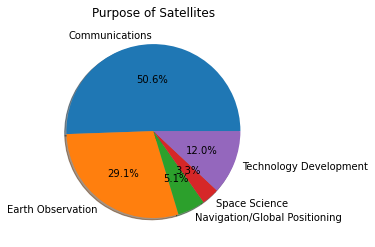

In [29]:
grouped_purpose = pd.Series(grouped_purpose)
grouped_purpose = grouped_purpose[grouped_purpose > 13]

labels = grouped_purpose.index.values
count = grouped_purpose.values

plt.pie(count, labels = labels, shadow = True, autopct='%1.1f%%')
plt.title('Purpose of Satellites')

plt.savefig("Purpose.png")

plt.show()
